# Coronavirus

* Coronavirus proviene de una enfermedad animal llamada **Zoonosis**. Se transmite entre animales y personas)
* Los sintomas son: fiebre, tos, problemas respiratorios.
* En casos graves, puede causar neumonía, síndrome respiratorios agudos, fallo de los riñones e includo la muerte.

* **Novel Coronavirus (nCoV)** es una nueva cepa que no había sido identificada en humanos anteriormente.

* Causas: **SARS-COV-2** corona virus.  
* Identificado inicialmente en: **Wuhan, Hubei, China**.  
* Los primeros sintomas fueron informados en: **1 Diciember 2019**. 
* Los primeros casos están ligados al contacto con el Mercado de Pescado y Marisco de Huanan. China, en el que se vendían animales vivos.
* El 30 de Enero de 2020 la OMS declaró el brote the Emergencia Pública Internacional.








## Import Libraries

In [497]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
import datetime
from statistics import mean 
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
from fbprophet import Prophet
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
init_notebook_mode(connected=True)





## Import the data (make sure you update this on a daily basis)

In [498]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

# Singapore data

In [499]:
# Singapore dataframes
singapore_confirmed_df = confirmed_df[confirmed_df['Country/Region']=='Singapore']
singapore_deaths_df = deaths_df[deaths_df['Country/Region']=='Singapore']
singapore_recoveries_df = recoveries_df[recoveries_df['Country/Region']=='Singapore']

In [500]:
# Group Singapore by Country/Region 
singapore_group_confirmed_df = singapore_confirmed_df.groupby('Country/Region').sum()
singapore_group_recoveries_df = singapore_recoveries_df.groupby('Country/Region').sum()
singapore_group_deaths_df = singapore_deaths_df.groupby('Country/Region').sum()


In [501]:
# Get columns with number of cases
singapore_confirmed = singapore_group_confirmed_df.loc[:, cols[4]:cols[-1]]
singapore_deaths = singapore_group_recoveries_df.loc[:, cols[4]:cols[-1]]
singapore_recoveries = singapore_group_deaths_df.loc[:, cols[4]:cols[-1]]

In [502]:
# Transpose data
singapore_confirm_trans = singapore_confirmed.transpose()
singapore_recoveries_trans = singapore_recoveries.transpose()
singapore_deaths_trans = singapore_deaths.transpose()

In [503]:
singapore_confirm_trans.tail()

Country/Region,Singapore
3/19/20,345.0
3/20/20,385.0
3/21/20,432.0
3/22/20,455.0
3/23/20,455.0


# China data

In [504]:
# China dataframes
china_confirmed_df = confirmed_df[confirmed_df['Country/Region']=='China']
china_deaths_df = deaths_df[deaths_df['Country/Region']=='China']
china_recoveries_df = recoveries_df[recoveries_df['Country/Region']=='China']

In [505]:
# Group China by Country/Region 
china_group_confirmed_df = china_confirmed_df.groupby('Country/Region').sum()
china_group_recoveries_df = china_recoveries_df.groupby('Country/Region').sum()
china_group_deaths_df = china_deaths_df.groupby('Country/Region').sum()


In [506]:
# Get columns with number of cases
china_confirmed = china_group_confirmed_df.loc[:, cols[4]:cols[-1]]
china_deaths = china_group_recoveries_df.loc[:, cols[4]:cols[-1]]
china_recoveries = china_group_deaths_df.loc[:, cols[4]:cols[-1]]

In [507]:
# Transpose data
china_confirm_trans = china_confirmed.transpose()
china_recoveries_trans = china_recoveries.transpose()
china_deaths_trans = china_deaths.transpose()

In [508]:
china_confirm_trans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 1/22/20 to 3/23/20
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   China   62 non-null     float64
dtypes: float64(1)
memory usage: 992.0+ bytes


# Spain data

In [509]:
spain_confirmed_df = confirmed_df[confirmed_df['Country/Region']=='Spain']
spain_deaths_df = deaths_df[deaths_df['Country/Region']=='Spain']
recoveries_df = recoveries_df[recoveries_df['Country/Region']=='Spain']

In [510]:
cols = spain_confirmed_df.keys()

Get all the dates for the outbreak

In [511]:
confirmed = spain_confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = spain_deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [512]:
# Transpose data
confirm_trans = confirmed.transpose()
recoveries_trans = recoveries.transpose()
deaths_trans = deaths.transpose()

In [513]:
# Rename column
old_names = [18] 
new_names = ['y']
confirm_trans.rename(columns=dict(zip(old_names, new_names)), inplace=True)
recoveries_trans.rename(columns=dict(zip(old_names, new_names)), inplace=True)
deaths_trans.rename(columns=dict(zip(old_names, new_names)), inplace=True)

## Filtering data

The first significant date with data is '3/1/20', so let

In [514]:
first_day = '3/1/20'
last_day = confirm_trans.index[-1]
print(first_day, last_day)
# Confirmed cases
confirm_trans_filter = confirm_trans.loc[first_day:last_day]

# Recovered cases
recoveries_trans_filter = recoveries_trans.loc[first_day:last_day]

# Death cases
deaths_trans_filter = deaths_trans.loc[first_day:last_day]

# Counting days
n_days = confirm_trans_filter.count()

3/1/20 3/23/20


### Ratio recovered/confirmed cases

In [515]:
rc = recoveries_trans_filter['y'].iloc[-1]/confirm_trans_filter['y'].iloc[-1]*100
print('Ratio recuperados/casos confirmados:', rc, '%')

Ratio recuperados/casos confirmados: 8.950917686318132 %


### Ratio deaths/confirmed cases

In [516]:
rd = deaths_trans_filter['y'].iloc[-1]/confirm_trans_filter['y'].iloc[-1]*100
print('Ratio muertes/casos confirmados:', rd, '%')

Ratio muertes/casos confirmados: 6.159621802002225 %


### Plot cases in Spain

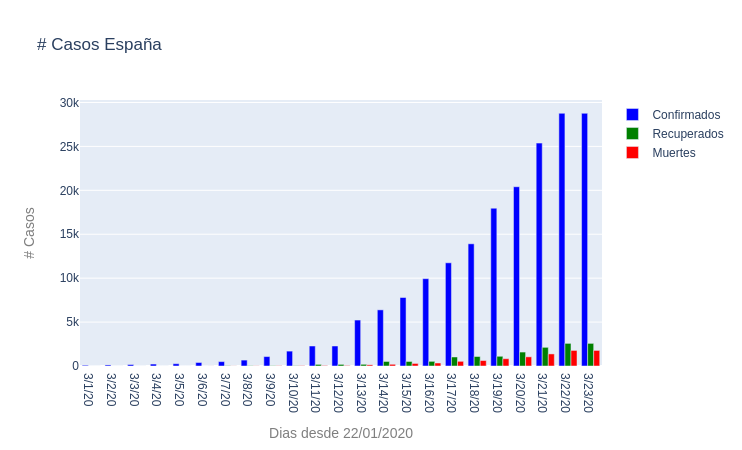

In [517]:
#data 
x = confirm_trans_filter.index
y = confirm_trans_filter['y']


# line confirmed
trace = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='blue'
    ),
    name="Confirmados"
)

# line recovered
# data 
x = recoveries_trans_filter.index
y = recoveries_trans_filter['y']

trace1 = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='green'
    ),
    name="Recuperados"
)

# data 
x = deaths_trans_filter.index
y = deaths_trans_filter['y']

trace2 = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='red'
    ),
    name="Muertes"
)

# layout
layout = go.Layout(title = "# Casos España",
                   xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace, trace1, trace2], layout=layout)
#fig.update_layout(yaxis_type="log")
iplot(fig)

## China/Singapore/Spain comparative

In [518]:
#x = range(0, int(confirm_trans_filter.count()))
x = range(0, int(china_confirm_trans.count()))
days = []
for n in x:
    days.append(n)
print(days)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61]


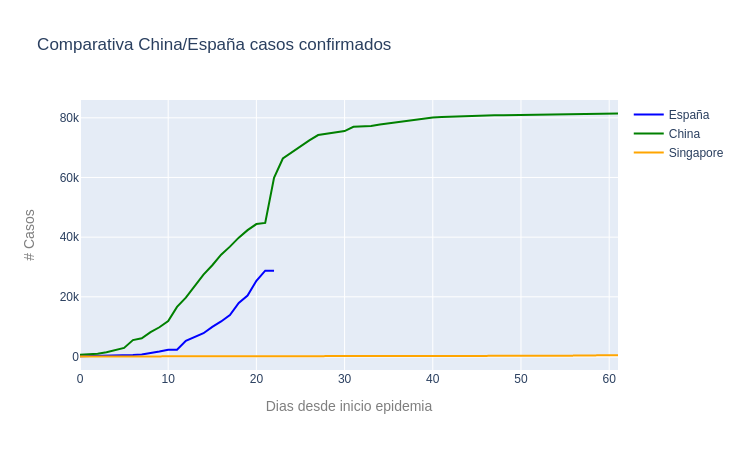

In [519]:
#data 
x = days
y = confirm_trans_filter['y']


# Spain confirmed lines
trace = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='blue'
    ),
    name="España"
)

# China confirmed line
# data 
x = days
y = china_confirm_trans['China']

trace1 = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='green'
    ),
    name="China"
)


# Singapore confirmed line
# data 
x = days
y = singapore_confirm_trans['Singapore']

trace2 = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='orange'
    ),
    name="Singapore"
)

# layout
layout = go.Layout(title = "Comparativa China/España casos confirmados",
                   xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde inicio epidemia', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace, trace1, trace2], layout=layout)
#fig.update_layout(yaxis_type="log")
iplot(fig)

### Confirmed cases logarithmic scale

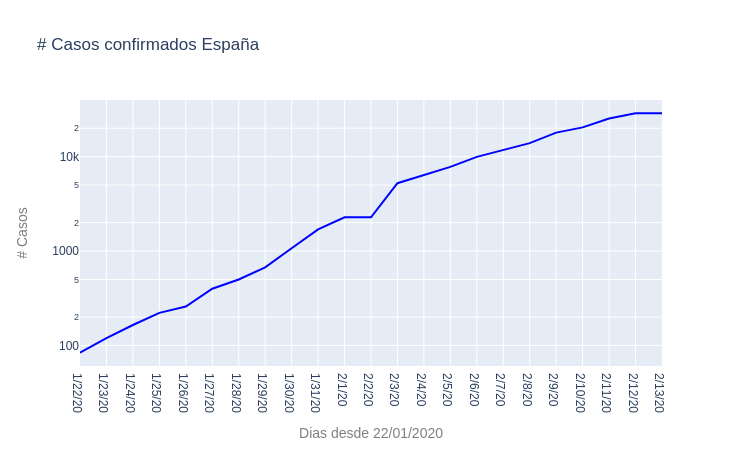

In [520]:
#data 
x = confirm_trans.index
y = confirm_trans_filter['y']


# line confirmed
trace = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='blue'
    ),
    name="Confirmados"
)



# layout
layout = go.Layout(title = "# Casos confirmados España",
                   xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
fig.update_layout(yaxis_type="log")
iplot(fig)

### Plot recovered cases in Spain

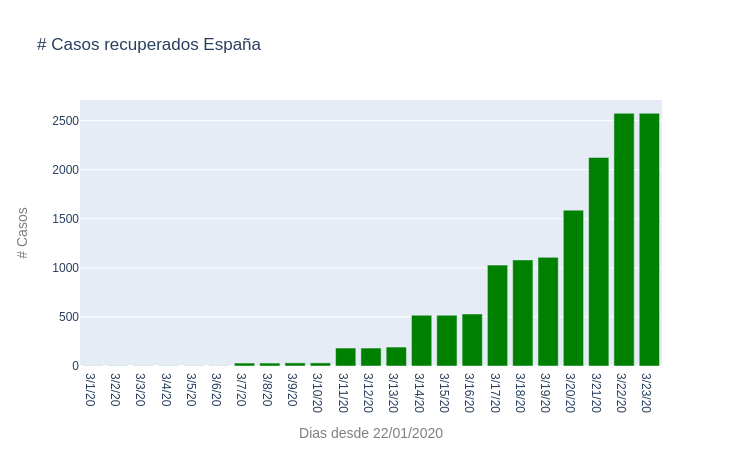

In [521]:
#data 
x = recoveries_trans_filter.index
y = recoveries_trans_filter['y']


# line
trace = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='green'
    ),
)


# layout
layout = go.Layout(title = "# Casos recuperados España",
    xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### Plot Death cases in Spain

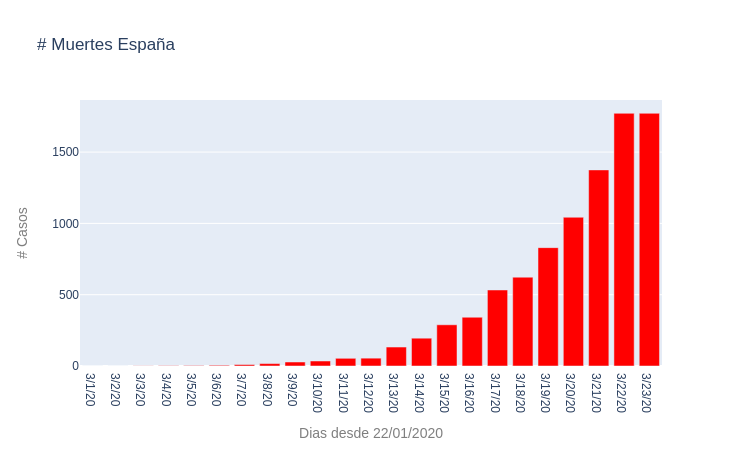

In [522]:
#data 
x = deaths_trans_filter.index
y = deaths_trans_filter['y']


# line
trace = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color='red'
    ),
)


# layout
layout = go.Layout(title = "# Muertes España",
    xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

### Plot Recovered and deaths

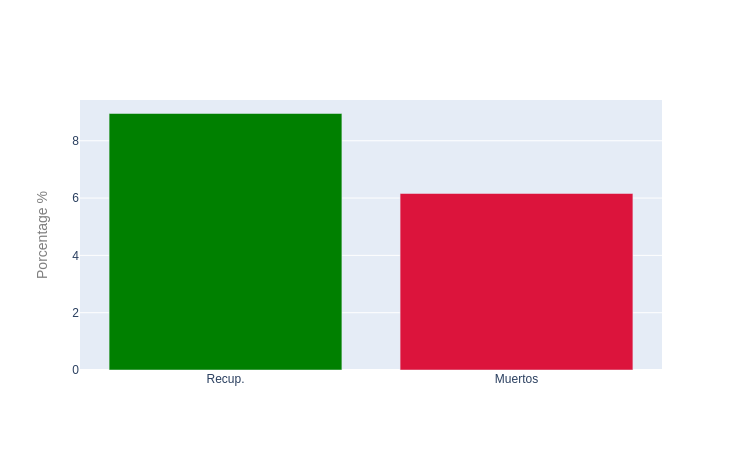

In [523]:
#data 
x = ("Recup.", "Muertos")
y = (rc, rd)

#Colors
colors = ['green',] * 5
colors[1] = 'crimson'

# line
trace = go.Bar(
    x=x,
    y=y,
    marker=dict(
        color=colors
    ),
)


# layout
layout = go.Layout(
    yaxis=dict(title = go.layout.yaxis.Title(text='Porcentage %', 
                                             font=dict(size=14, 
                                             color='#7f7f7f')))
)

# Plot
fig = go.Figure(data=[trace], layout=layout)
iplot(fig)

## Exponential Growth

In [524]:
# Create column of difference between Nd and Nd-1
confirm_trans_filter['changes'] = confirm_trans_filter.y - confirm_trans_filter.y.shift(1)
confirm_trans_filter.tail()

,y,changes
3/19/20,17963.0,4053.0
3/20/20,20410.0,2447.0
3/21/20,25374.0,4964.0
3/22/20,28768.0,3394.0
3/23/20,28768.0,0.0


In [525]:
# Create column of difference between Nd changes and Nd-1 changes
confirm_trans_filter['Growth Factor'] = confirm_trans_filter.changes / confirm_trans_filter.changes.shift(1)
confirm_trans_filter.tail()



,y,changes,Growth Factor
3/19/20,17963.0,4053.0,1.874653
3/20/20,20410.0,2447.0,0.603750
3/21/20,25374.0,4964.0,2.028606
3/22/20,28768.0,3394.0,0.683723
3/23/20,28768.0,0.0,0.000000


In [526]:
# Clean inf data
confirm_trans_filter['Growth Factor'] = confirm_trans_filter['Growth Factor'].replace(np.inf, 0)

### Plot Growth Factor

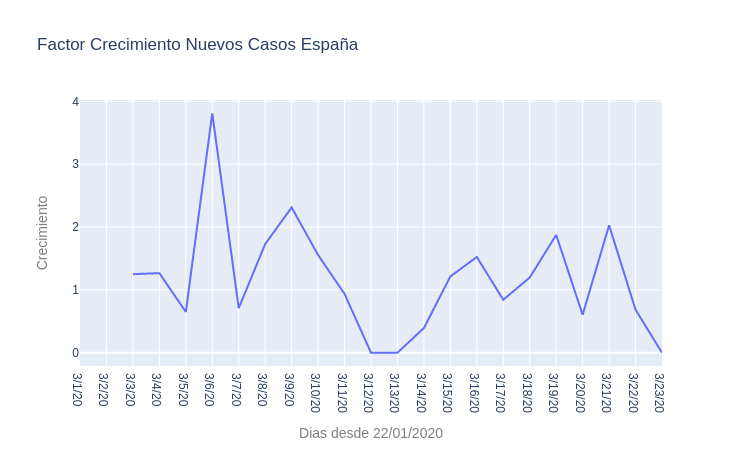

In [527]:
#data 
x = confirm_trans_filter.index
y = confirm_trans_filter['Growth Factor']
#mean = mean(y)

# line
trace = go.Line(
    x=x,
    y=y,
)


# layout
layout = go.Layout(title = "Factor Crecimiento Nuevos Casos España",
    xaxis=dict(title = go.layout.xaxis.Title(text='Dias desde 22/01/2020', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='Crecimiento', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace], layout=layout)
#fig.update_layout(yaxis_type="log")
iplot(fig)

In [ ]:
#Create a 100-day series

x2 = []
x = confirm_trans.index.values

for num in range(1,100):
#Get the last date 
    datetime_object = datetime.datetime.strptime(x[-1], '%m/%d/%y') + datetime.timedelta(days=1)
    #Time to string
    d = datetime_object.strftime("%m/%d/%y")
    print(d)

    #Add it to new array
    x2.append(d)

    #Concatenate both arrays
    x = np.concatenate((x, x2))


# Forecasting


## SARIMA Model for Time Series Forecasting 

### Creating confirmed train and test set 

In [529]:
df = confirm_trans_filter

In [530]:
# split into train and test sets
train, test = train_test_split(df, test_size=0.2, shuffle=False)

Let’s visualize the data (train and test together) to know how it varies over a time period.

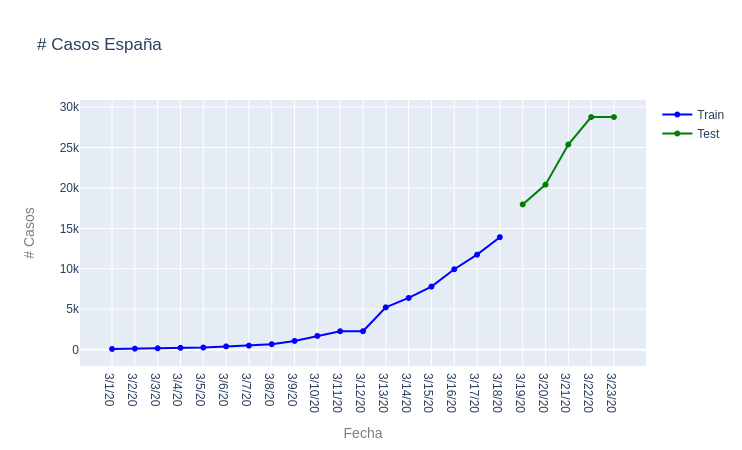

In [531]:
#data 
x = train.index
y = train['y']

# Train line 
trace = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='blue'
    ),
    name="Train"
)

# Test line
# data 
x = test.index
y = test['y']

trace1 = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='green'
    ),
    name="Test"
)


# layout
layout = go.Layout(title = "# Casos España",
                   xaxis=dict(title = go.layout.xaxis.Title(text='Fecha', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace, trace1], layout=layout)
#fig.update_layout(yaxis_type="log")
iplot(fig)

### Training

In [532]:
train.head()

,y,changes,Growth Factor
3/1/20,84.0,NaN,NaN
3/2/20,120.0,36.0,NaN
3/3/20,165.0,45.0,1.250000
3/4/20,222.0,57.0,1.266667
3/5/20,259.0,37.0,0.649123


In [533]:
# Dates
start_date = test.index[0]
end_date = test.index[-1]

In [534]:
print(end_date)

3/23/20


In [535]:
warnings.filterwarnings("ignore")
y_hat_avg = test.copy()
fit1 = sm.tsa.statespace.SARIMAX(train.y, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit()
y_hat_avg['SARIMA'] = fit1.predict(start=start_date, end=end_date, dynamic=True)


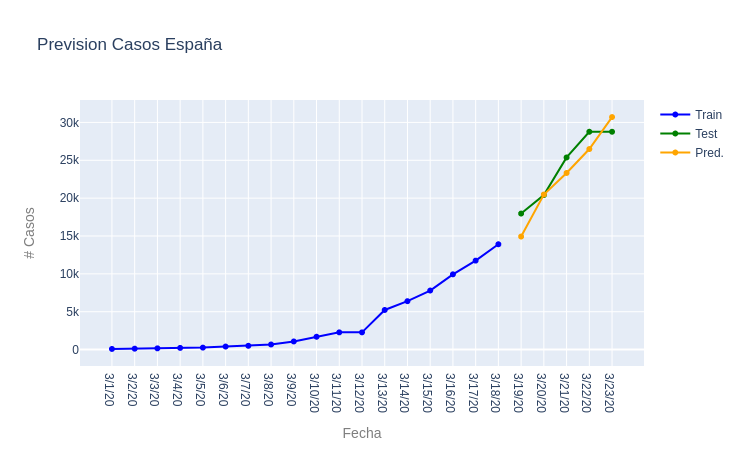

In [536]:
#data 
x = train.index
y = train['y']

# Train line 
trace = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='blue'
    ),
    name="Train"
)

# Test line
# data 
x = test.index
y = test['y']

trace1 = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='green'
    ),
    name="Test"
)

# Prediccion line
# data 
x = y_hat_avg.index
y = y_hat_avg['SARIMA']

trace2 = go.Line(
    x=x,
    y=y,
    marker=dict(
        color='orange'
    ),
    name="Pred."
)

# layout
layout = go.Layout(title = "Prevision Casos España",
                   xaxis=dict(title = go.layout.xaxis.Title(text='Fecha', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))), 
                   yaxis=dict(title = go.layout.yaxis.Title(text='# Casos', 
                                             font=dict(size=14, 
                                             color='#7f7f7f'))))

# Plot
fig = go.Figure(data=[trace, trace1, trace2], layout=layout)
#fig.update_layout(yaxis_type="log")
iplot(fig)

### RMSE

In [537]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(test.y, y_hat_avg.SARIMA))
print('RMSE:', rms)


RMSE: 2116.5984088038394


## Evaluate SARIMA Mode

### Iterate SARIMA Parameters
https://machinelearningmastery.com/how-to-grid-search-sarima-model-hyperparameters-for-time-series-forecasting-in-python/

In [464]:

# grid search sarima hyperparameters for monthly car sales dataset
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

In [473]:
# one-step sarima forecast
def sarima_forecast(history, config):
	order, sorder, trend = config
	# define model
	model = SARIMAX(history, order=order, seasonal_order=sorder, trend=trend, enforce_stationarity=False, enforce_invertibility=False)
	# fit model
	model_fit = model.fit(disp=False)
	# make one step forecast
	yhat = model_fit.predict(len(history), len(history))
	return yhat[0]
 

In [474]:
# root mean squared error or rmse
def measure_rmse(actual, predicted):
	return sqrt(mean_squared_error(actual, predicted))

In [475]:
 # split a univariate dataset into train/test sets
def train_test_split(data, n_test):
	return data[:-n_test], data[-n_test:]


In [476]:
# walk-forward validation for univariate data
def walk_forward_validation(data, n_test, cfg):
	predictions = list()
	# split dataset
	train, test = train_test_split(data, n_test)
	# seed history with training dataset
	history = [x for x in train]
	# step over each time-step in the test set
	for i in range(len(test)):
		# fit model and make forecast for history
		yhat = sarima_forecast(history, cfg)
		# store forecast in list of predictions
		predictions.append(yhat)
		# add actual observation to history for the next loop
		history.append(test[i])
	# estimate prediction error
	error = measure_rmse(test, predictions)
	return error

In [483]:
# score a model, return None on failure
def score_model(data, n_test, cfg, debug=False):
	result = None
	# convert config to a key
	key = str(cfg)
	# show all warnings and fail on exception if debugging
	if debug:
		result = walk_forward_validation(data, n_test, cfg)
	else:
		# one failure during model validation suggests an unstable config
		try:
			# never show warnings when grid searching, too noisy
			with catch_warnings():
				filterwarnings("ignore")
				result = walk_forward_validation(data, n_test, cfg)
		except:
			error = None
	# check for an interesting result
	if result is not None:
		print(' > Model[%s] %.3f' % (key, result))
	return (key, result)

In [484]:
# grid search configs
def grid_search(data, cfg_list, n_test, parallel=True):
	scores = None
	if parallel:
		# execute configs in parallel
		executor = Parallel(n_jobs=cpu_count(), backend='multiprocessing')
		tasks = (delayed(score_model)(data, n_test, cfg) for cfg in cfg_list)
		scores = executor(tasks)
	else:
		scores = [score_model(data, n_test, cfg) for cfg in cfg_list]
	# remove empty results
	scores = [r for r in scores if r[1] != None]
	# sort configs by error, asc
	scores.sort(key=lambda tup: tup[1])
	return scores

In [485]:
# create a set of sarima configs to try
def sarima_configs(seasonal=[0]):
	models = list()
	# define config lists
	p_params = [0, 1, 2]
	d_params = [0, 1]
	q_params = [0, 1, 2]
	t_params = ['n','c','t','ct']
	P_params = [0, 1, 2]
	D_params = [0, 1]
	Q_params = [0, 1, 2]
	m_params = seasonal
	# create config instances
	for p in p_params:
		for d in d_params:
			for q in q_params:
				for t in t_params:
					for P in P_params:
						for D in D_params:
							for Q in Q_params:
								for m in m_params:
									cfg = [(p,d,q), (P,D,Q,m), t]
									models.append(cfg)
	return models

In [496]:
data = pd.Series(df['y'])
print(data.shape)
# data split
n_test = 6
# model configs
cfg_list = sarima_configs(seasonal=[0,2,6])
# grid search
scores = grid_search(data, cfg_list, n_test)
print('done')
# list top 3 configs
for cfg, error in scores[:3]:
    print(cfg, error)

(23,)
 > Model[[(0, 0, 0), (0, 0, 0, 2), 'n']] 23208.336
 > Model[[(0, 0, 0), (0, 0, 0, 0), 'n']] 23208.336
 > Model[[(0, 0, 0), (0, 0, 0, 6), 'n']] 23208.336
 > Model[[(0, 0, 0), (0, 1, 0, 2), 'n']] 6230.564
 > Model[[(0, 0, 0), (0, 1, 0, 6), 'n']] 15529.283
 > Model[[(0, 0, 0), (0, 0, 1, 2), 'n']] 13323.214
 > Model[[(0, 0, 0), (1, 0, 0, 6), 'n']] 8151.187
 > Model[[(0, 0, 0), (1, 0, 0, 2), 'n']] 3505.149
 > Model[[(0, 0, 0), (0, 1, 1, 6), 'n']] 10009.500
 > Model[[(0, 0, 0), (0, 1, 1, 2), 'n']] 4064.849
 > Model[[(0, 0, 0), (1, 1, 0, 2), 'n']] 2682.210
 > Model[[(0, 0, 0), (1, 0, 1, 2), 'n']] 3427.039
 > Model[[(0, 0, 0), (0, 0, 2, 2), 'n']] 8970.994
 > Model[[(0, 0, 0), (1, 1, 0, 6), 'n']] 7918.208
 > Model[[(0, 0, 0), (0, 1, 2, 2), 'n']] 6637765.553
 > Model[[(0, 0, 0), (0, 0, 2, 6), 'n']] 11414.036
 > Model[[(0, 0, 0), (1, 0, 2, 2), 'n']] 3622.294
 > Model[[(0, 0, 0), (2, 0, 0, 6), 'n']] 10234.288
 > Model[[(0, 0, 0), (1, 1, 1, 2), 'n']] 3114.098
 > Model[[(0, 0, 0), (2, 0, 0, 2)

KeyboardInterrupt: 